## Project #1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy   import   stats

* Healthcare data breaches are increasing. These breaches can cause patient safety issues and loss of data integrity.
All healthcare data breaches affecting over 500 individuals must be reported to the Department of Health and Human services (DHHS).
Thus, it is important to understand factors related to data breaches. The data for this assignment is a theoretical set of breach data for breach reporting at several points in time.
* The data variables are:
   + Hospital – abbreviation for the hospital that was surveyed about breaches in the last few years
   + Breach – 1 for breach reported, 0 for no breach
   + Ba_present - 1 for business associate present at the time of breach, 0 for business associate not present at the time of breach
   + Numrecs – the number of records affected by the breach


In [2]:
# read the data
df = pd.read_csv('databreach.csv')

In [3]:
# display data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hospital    60 non-null     object
 1   breach      60 non-null     int64 
 2   ba_present  60 non-null     int64 
 3   numrecs     60 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [4]:
# display the first few records
df.head()

,hospital,breach,ba_present,numrecs
0,CLH,0,1,502
1,MH,1,1,500
2,MH,1,0,497
3,MH,1,0,506
4,CLH,0,0,503


In [5]:
# describe the data
df.describe()

,breach,ba_present,numrecs
count,60.000000,60.000000,60.000000
mean,0.566667,0.566667,500.483333
std,0.499717,0.499717,4.236611
min,0.000000,0.000000,489.000000
25%,0.000000,0.000000,497.000000
50%,1.000000,1.000000,500.000000
75%,1.000000,1.000000,503.000000
max,1.000000,1.000000,510.000000


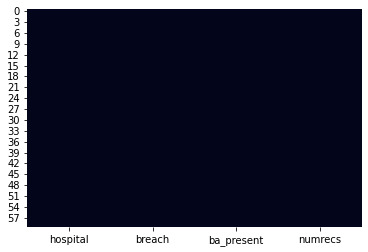

In [6]:
# check for missing data for all columns
# using missingness map to check for missing data
sns.heatmap(df.isnull(), cbar=False);
# no missing data

In [7]:
# get value counts for breach
df["breach"].value_counts()
# 34 breaches and 26 no breaches

1    34
0    26
Name: breach, dtype: int64

In [8]:
# display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hospital    60 non-null     object
 1   breach      60 non-null     int64 
 2   ba_present  60 non-null     int64 
 3   numrecs     60 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


[Text(0.5, 1.0, 'Hospital and Number of Records'),
 Text(0.5, 0, 'hospital'),
 Text(0, 0.5, 'numrecs')]

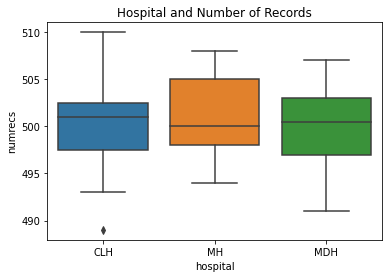

In [9]:
# create a boxplot of hospital and numrecs
ax = sns.boxplot(x='hospital', y ='numrecs', data=df)
ax.set(title='Hospital and Number of Records',xlabel='hospital',ylabel='numrecs')

In [11]:
# conduct a Chi Square test of independence for breach and ba present
# H0: The two variables are independent
# H1: The two variables are dependent

# need cross table of the counts for the Chi Square test
crosstab = pd.crosstab(df.breach, df.ba_present,margins=True,margins_name="Totals")
crosstab

chi2, p, dof, ex = stats.chi2_contingency(crosstab)

print('\n chi square test statistic = ', round(chi2,4))
print('\n p-value = ',round(p,5))


ba_present,0,1,Totals
breach,,,
0,20,6,26
1,6,28,34
Totals,26,34,60



 chi square test statistic =  21.0819

 p-value =  0.00031


In [12]:
# Analysis: Complete the sentence
# Because p __<___alpha, we __reject_____ the null hypothesis. We conclude that data breach
# and BA present are ____dependent______

In [13]:
# conduct a Chi Square test of independence for breach and hospital
# H0: The two variables are independent
# H1: The two variables are dependent
# need cross table of the counts for the Chi Square test
crosstab = pd.crosstab(df.breach, df.hospital,margins=True,margins_name="Totals")
crosstab

chi2, p, dof, ex = stats.chi2_contingency(crosstab)

print('\n chi square test statistic = ', round(chi2,4))
print('\n p-value = ',round(p,5))

hospital,CLH,MDH,MH,Totals
breach,,,,
0,12,7,7,26
1,7,7,20,34
Totals,19,14,27,60



 chi square test statistic =  6.6262

 p-value =  0.3568


In [14]:
# Analysis: Complete the sentence
# Because p ___<__alpha, we ___reject____ the null hypothesis. We conclude that data breach
# and hospital are ____dependent______

In [15]:
# Analysis: type in the answers
# How many records are in this data frame? 
## 60 records
# How many hospitals had breaches ? 
## 3 hospitals had breaches i.e CLH, MDH,MH
# How many hospitals did not have breaches? 
## 3 hospitals
# How many breaches did the hospital MH have ?
## 20 breaches
# How many breaches did the hospital CLH have ?
## 7 breaches